In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
import prepro as mypp #nuestra librerías de transformaciones.
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

# 1. Trabajar con el dataset del Titanic visto en clase.

In [3]:
#carga de dataset archivo base de datos cliente
dataset_titanic = pd.read_csv("C:/Users/hevas/Downloads/proyecto_apis/train.csv", sep=',')
dataset_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. Análisis exploratorio: debe realizarlo para todo el dataset, mostrando información relevante. Mostrar resultados y gráficas

In [6]:
dataset_titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [7]:
dataset_titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [37]:
dataset_titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


N: No sobrevive: 549
S: Sobrevive: 342
Proporción: 1.61 : 1


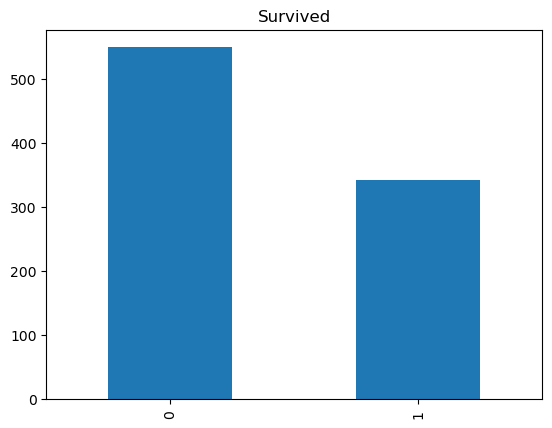

In [38]:
# Detección del desbalance de la muestras
target_count = dataset_titanic.Survived.value_counts()
print('N: No sobrevive:', target_count[0])
print('S: Sobrevive:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Survived');

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

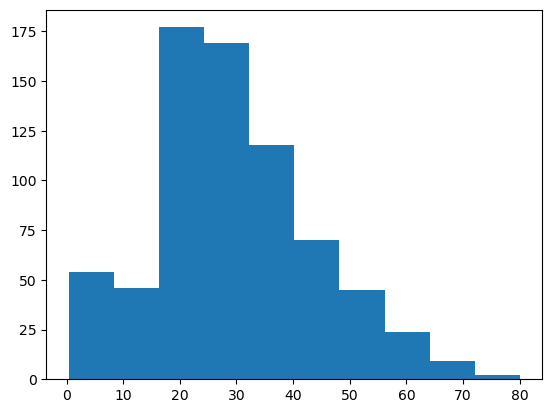

In [60]:
plt.hist(dataset_titanic.Age)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

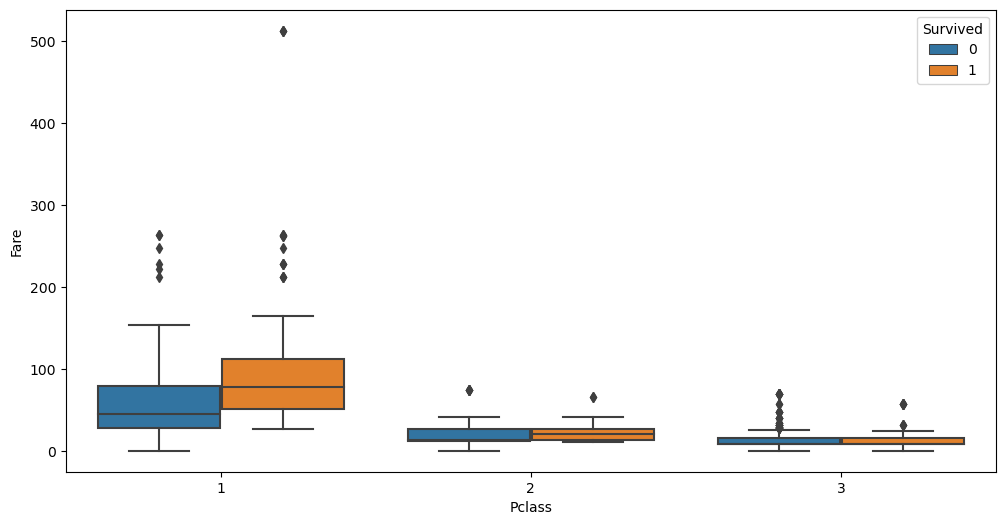

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Pclass",y="Fare", hue="Survived", data=dataset_titanic)

In [62]:
correlaciones = dataset_titanic.corr()
correlaciones

C:\Users\hevas\AppData\Local\Temp\ipykernel_5468\2859651683.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = dataset_titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

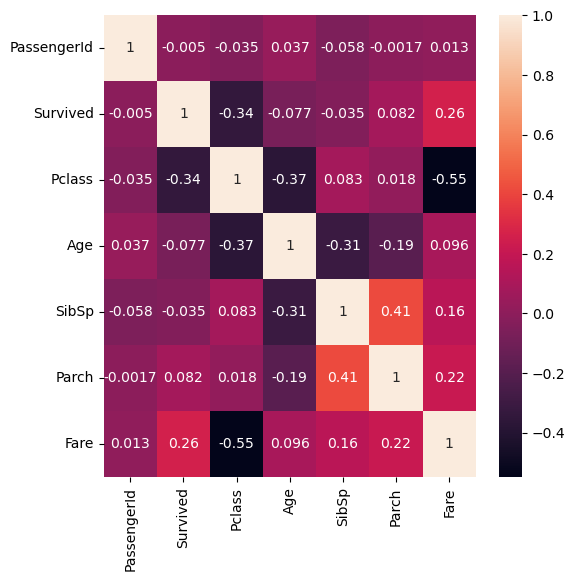

In [100]:
#mapa de correlacion
plt.figure(figsize=(6,6))
sns.heatmap(correlaciones,annot = True)

# 3. Selección de Variables:
## a. Variable a predecir: tipo categórico
## b. Variables predictoras: variables que considere esenciales.

# Train Test Split para Entrenamiento y Prueba

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin','SibSp','Parch'
                          ,'Fare'], axis=1),
    dataset_titanic['Survived'],
    test_size=0.3,
    random_state=2022)

In [28]:
#imputación de variables categóricas
CATEGORICAL_VARS_WITH_NA_FREQUENT = ['Embarked']

In [25]:
#imputación de variables categoricas con indicador de Faltante (Missing)
#CATEGORICAL_VARS_WITH_NA_MISSING = ['Embarked']

In [10]:
#Variables para codificación ordinal.
#QUAL_VARS = ['Pclass', 'SibSp', 'Parch', 'Fare']

QUAL_VARS = ['Embarked']

In [11]:
dataset_titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
EXPOSURE_VARS = ['Sex']

In [13]:
#Variables que eliminaremos
DROP_FEATURES = ['Survived']

In [27]:
#Imputación de variables numéricas
NUMERICAL_VARS_WITH_NA = ['Age']

In [15]:
#Mapeo para varibels categótricas para calidad.
QUAL_MAPPINGS = {'S': 1, 'C': 2, 'Q': 3}
EXPOSURE_MAPPINGS = {'male': 1, 'female': 2}

In [16]:
#Variables a utilzar en el entrenamiento
FEATURES = ['Pclass','Age','Embarked','Sex']

# 4. Construcción del Pipeline

In [74]:
titanic_pipeline = Pipeline([
    
    #=========== IMPUTACIONES ===============
    
    #1. Imputaciín de variables categóricas con indicador de faltante
    #('missing_imputation',
    #    CategoricalImputer(imputation_method='missing', variables=CATEGORICAL_VARS_WITH_NA_MISSING)
    #),
    
    #2. Imputación de varaibles categóticas basada en frecuencia
    ('frequent_imputation',
        CategoricalImputer(imputation_method='frequent', variables=CATEGORICAL_VARS_WITH_NA_FREQUENT)
    ),
    
    #3. Indicador faltane en variables numericas para imputación
    ('missing_indicator_numeric',
        AddMissingIndicator(variables=NUMERICAL_VARS_WITH_NA)
    ),
    
    #4. Imputación de variables numéricas
    ('mean_imputation',
        MeanMedianImputer(imputation_method='mean', variables=NUMERICAL_VARS_WITH_NA)
    ),
    
    #========== VARIABLES TEMPORALES ================
    
    #5. tratamiento de variables temporales (diferencias)
    #('elapsed_time', mypp.TremporalVariableTransformer(
    #    variables=TEMPORAL_VARS, reference_variable=REF_VAR)
    #),
    
    #6. Drop de variables.
    #('drop_time_features',
    #    DropFeatures(features_to_drop=DROP_FEATURES)
    #),
    
    
    #============= CODIFICACIÓN DE VARIABLES CATEGORICAS ORINALES ==================
    ('quality_mapper',
        mypp.Mapper(variables=QUAL_VARS, mappings=QUAL_MAPPINGS)
    ),
    
    ('exposure_mapper',
       mypp.Mapper(variables=EXPOSURE_VARS, mappings=EXPOSURE_MAPPINGS)
    ),
    
    #('garage_mapper',
    #    mypp.Mapper(variables=GARAGE_VARS, mappings=GARAGE_MAPPINGS)
    #),
    
    #('finish_mapper',
    #    mypp.Mapper(variables=FINISH_VARS, mappings=FINISH_MAPPINGS)
    #),
    
    #============= CODIFICACIÓN DE VARIABLES CATEGORICAS NOMINALES ==================
    #('rare_label_encoder',
    #    RareLabelEncoder(n_categories=1, tol=0.01, variables=CATEGORICAL_VARS)
    #),
    
    #('categorical_encoder',
    #    OrdinalEncoder(encoding_method='ordered', variables=CATEGORICAL_VARS)
    #),
    
    #=============== TRANSFORMACIÓN DE VARIABLES CONTINUAS ============
    #('log_transformer',
    #    LogTransformer(variables=NUMERICAL_LOG_VARS)
    #),
    
    #('binarizer_transform',
    #    SklearnTransformerWrapper(transformer=Binarizer(threshold=0), variables=BINARIZE_VARS)
    #),
    
     #=============== SCALER ============
    ('scaler',
        StandardScaler()
    ),
    
    ('modelo_decisionTree', 
         DecisionTreeClassifier()
    )
])

In [75]:
titanic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('frequent_imputation',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Embarked'])),
                ('missing_indicator_numeric',
                 AddMissingIndicator(variables=['Age'])),
                ('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('quality_mapper',
                 Mapper(mappings={nan: 0, 'C': 2, 'Q': 3, 'S': 1},
                        variables=['Embarked'])),
                ('exposure_mapper',
                 Mapper(mappings={'female': 2, 'male': 1}, variables=['Sex'])),
                ('scaler', StandardScaler()),
                ('modelo_decisionTree', DecisionTreeClassifier())])

In [76]:
X_test = X_test[FEATURES]

In [77]:
preds = titanic_pipeline.predict(X_test)

In [78]:
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [80]:
accuracy = accuracy_score(y_test, preds)
accuracy_tree = accuracy
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, preds)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 79.48%
Log Loss: 7.088235427141162


Matriz de Confusión - DATOS ORIGINALES:
 [[150  18]
 [ 37  63]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       168
           1       0.78      0.63      0.70       100

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



C:\Users\hevas\AppData\Local\Temp\ipykernel_5468\2853170892.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_5468\2853170892.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


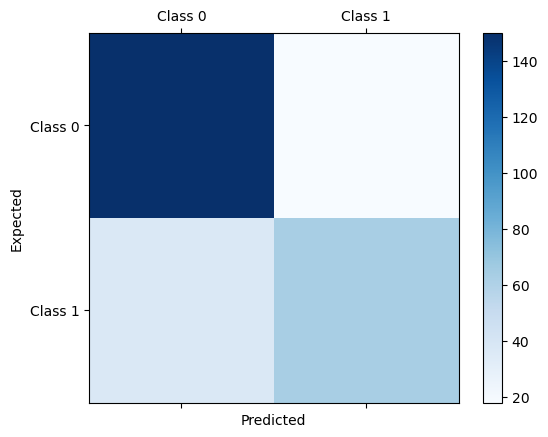

In [85]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=preds)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,preds))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [88]:
#guardamos pipeline para uso en producción.
joblib.dump(titanic_pipeline, 'titanic_pipeline.pkl')

['titanic_pipeline.pkl']

In [89]:
joblib.dump(FEATURES, 'FEATURES.pkl')

['FEATURES.pkl']